In [1]:
import json
import pylab as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd
import matplotlib.path as mplPath
import matplotlib.patches as patches

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [3]:
with open('data.dat') as f:
    l = json.load(f)
    data = []
    for one in l:
        runID, fileID, eventID, d = one['runID'], one['fileID'], one['eventID'], one['data']
        entry = {'runID': runID, 'fileID': fileID, 'eventID': one['eventID'],
               'theta1':d[0][0][0],'L1':d[0][0][1],
               'theta2':d[0][1][0],'L2':d[0][1][1],'Range':d[1]}
        
        data.append(entry)

In [4]:
container = {}
names = data[0].keys()
for _ in names: container[_] = []

for d in data:
    for n in names:
        container[n].append(d[n])
df = pd.DataFrame(container)

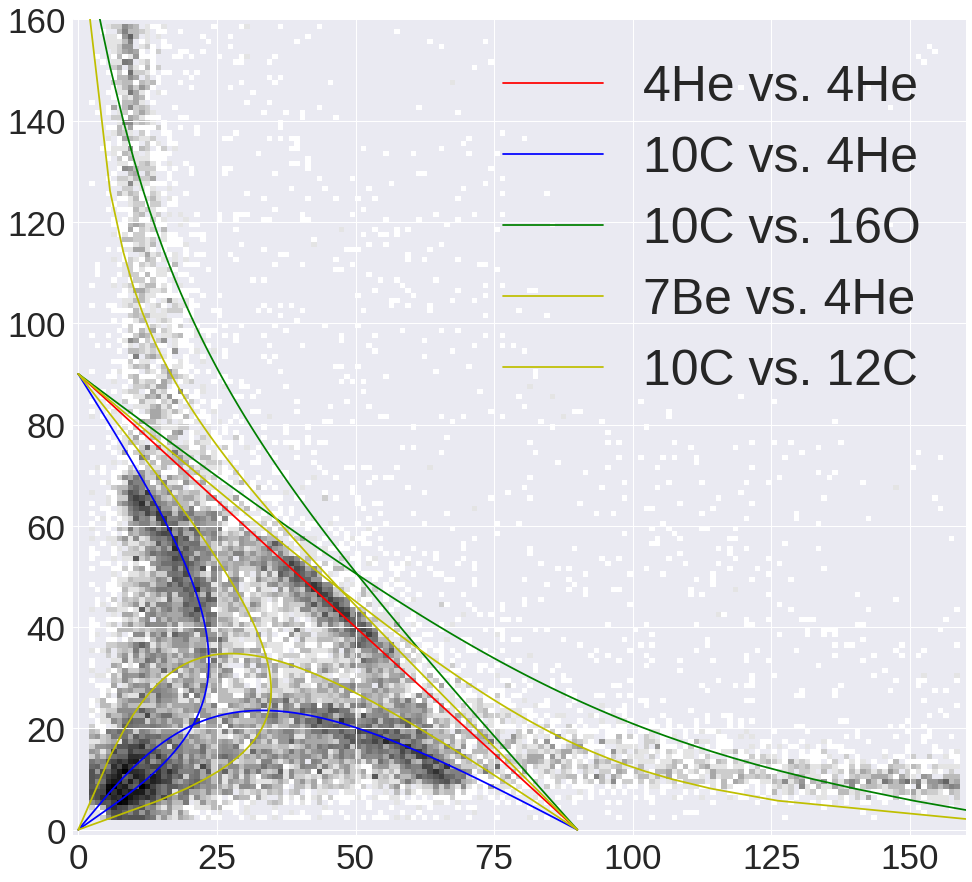

In [33]:
fig = plt.figure(figsize=(20,15))


poly = [[55,77],[50,65],[65,50],[77,55],[55,77]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

poly = [[68,45],[85,15],[70,15],[60,35],[68,45]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

poly = [[90,10],[110,10],[110,30],[90,30],[90,10]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

mask = (df['Range']>3) & df['L1'].between(1,10000) & df['L2'].between(1,10000) & df['theta1'].between(2,160) & df['theta2'].between(2,160)
    
df_tmp = df[mask]

x,y = np.sort(df_tmp[['theta1','theta2']],axis=1).T
#print np.concatenate([x,y])
plt.hist2d(np.concatenate([x,y]),np.concatenate([y,x]),bins=[np.arange(0,160,1),np.arange(0,160,1)],norm=LogNorm());
plt.colorbar()
#plt.gca().add_patch(patch1)

plt.tick_params(axis='both', which='major', labelsize=35)

#plt.axis('off')
fig.delaxes(fig.axes[1]) 

plt.plot([0,90],[90,0],c='r',label='4He vs. 4He')

t1,t2 =[], []
with open("10C_4He_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
plt.plot(t1,t2,c='b')
plt.plot(t2,t1,c='b',label='10C vs. 4He')

t1,t2 =[], []
with open("10C_16O_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
plt.plot(t1,t2,c='g')
plt.plot(t2,t1,c='g',label='10C vs. 16O')

t1,t2 =[], []
with open("7Be_4He_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
plt.plot(t1,t2,c='y')
plt.plot(t2,t1,c='y',label='7Be vs. 4He')


t1,t2 =[], []
with open("10C_12C_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
plt.plot(t1,t2,c='y')
plt.plot(t2,t1,c='y',label='10C vs. 12C')
plt.xlim(-1,160)
plt.ylim(-1,160)

plt.legend(loc=1,prop={'size': 50})


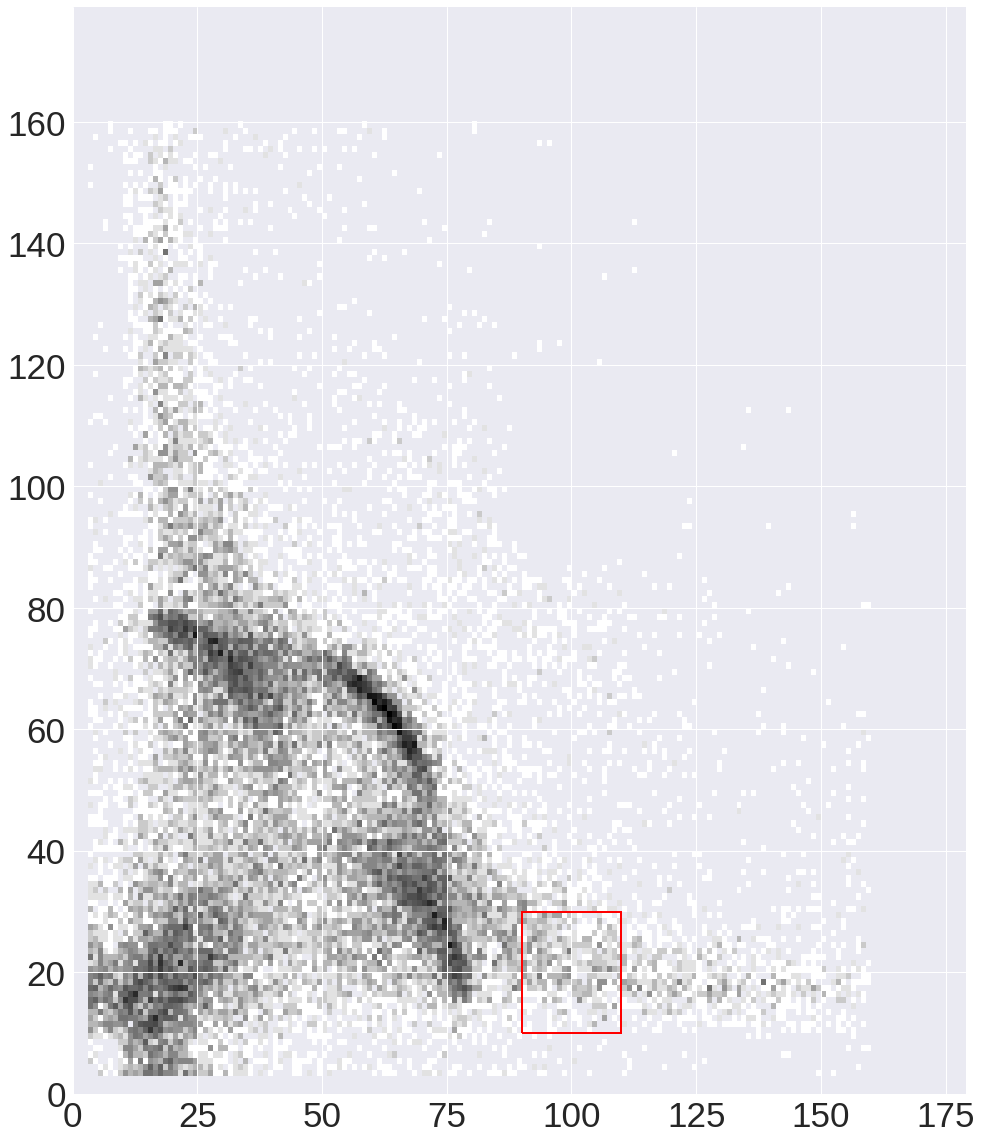

In [8]:
fig = plt.figure(figsize=(20,20))


poly = [[55,77],[50,65],[65,50],[77,55],[55,77]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

poly = [[68,45],[85,15],[70,15],[60,35],[68,45]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

poly = [[90,10],[110,10],[110,30],[90,30],[90,10]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

mask = (df['Range']>10) & df['L1'].between(3,10000) & df['L2'].between(3,10000) & df['theta1'].between(3,160) & df['theta2'].between(3,160)
df_tmp = df[mask]

x,y = np.sort(df_tmp[['theta1','theta2']],axis=1).T
#print np.concatenate([x,y])
plt.hist2d(np.concatenate([x,y]),np.concatenate([y,x]),bins=[np.arange(0,180,1),np.arange(0,180,1)],norm=LogNorm());
plt.colorbar()
plt.gca().add_patch(patch1)

plt.tick_params(axis='both', which='major', labelsize=35)

#plt.axis('off')
fig.delaxes(fig.axes[1]) 

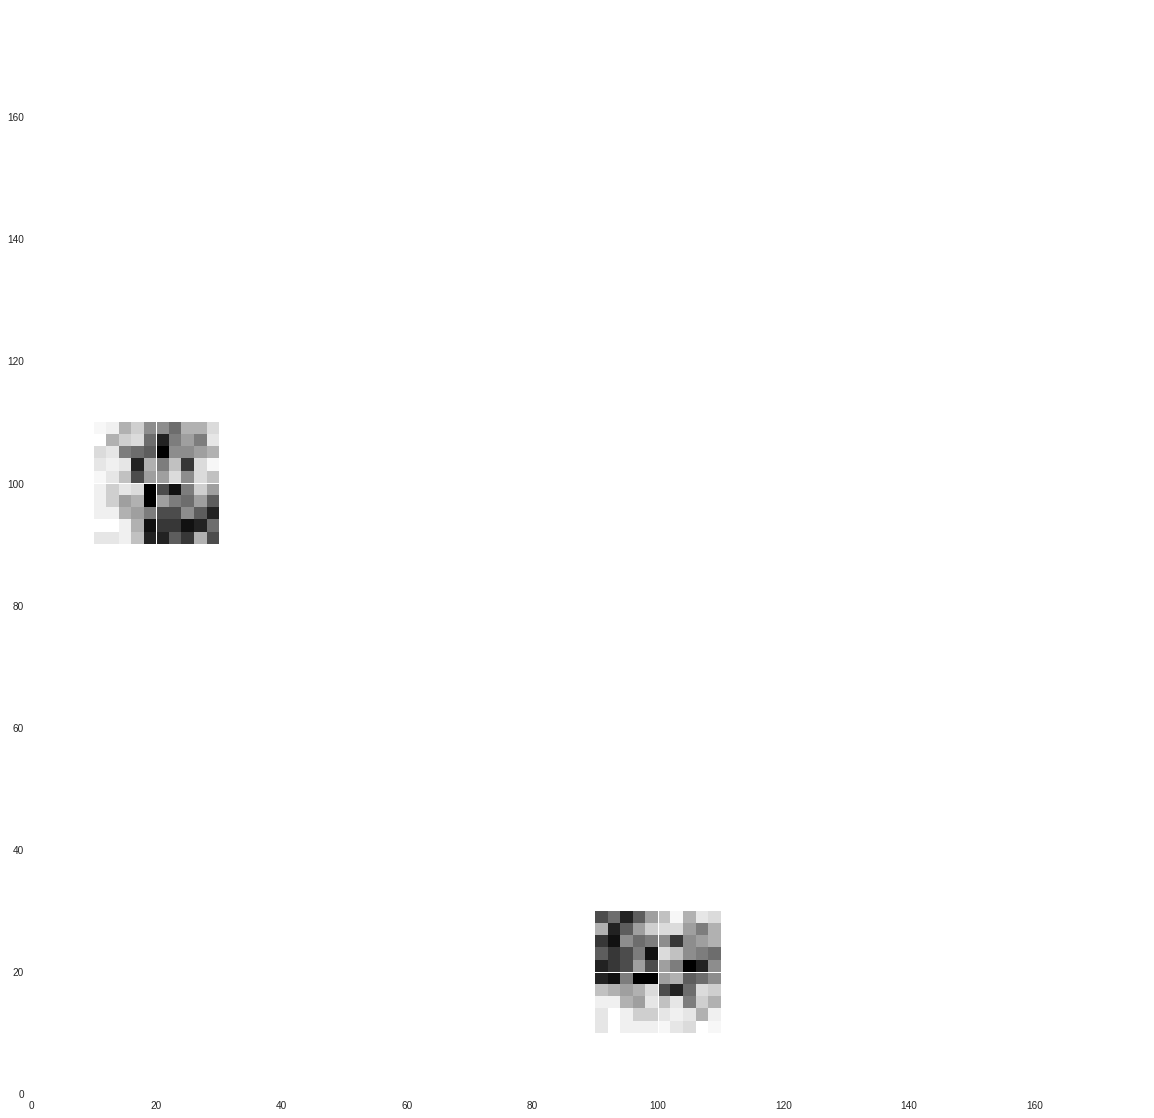

In [9]:
mask1 = path1.contains_points(np.stack([x,y]).T) | path1.contains_points(np.stack([y,x]).T)
#plt.scatter(x[mask1],y[mask1])
df_tmp1 = df_tmp[mask1]
x1,y1 = np.sort(df_tmp1[['theta1','theta2']],axis=1).T


plt.hist2d(np.concatenate([y1,x1]),np.concatenate([x1,y1]),
           bins=[np.arange(0,180,2),np.arange(0,180,2)]);
#plt.xlim([0,180])
#plt.ylim([0,180])

In [126]:
pd.pivot_table(df_tmp[mask1][['fileID','runID']],  index='fileID',columns='runID', aggfunc=len)

runID,85,88
fileID,,
0,98.0,19.0
1,91.0,42.0
2,110.0,NaN
3,115.0,58.0
4,109.0,76.0
5,93.0,58.0
6,104.0,69.0
7,134.0,41.0
8,106.0,96.0


In [10]:
df_tmp1 = df_tmp[mask1]
mask2 = np.logical_and(*(df_tmp1[['runID','fileID']].values == [85,5]).T)
df_tmp1[mask2]['eventID'].values

array([ 106,  151,  190,  258,  263,  316,  388,  401,  413,  462,  556,
        643,  687,  783,  789,  809,  885, 1062, 1214, 1252, 1280, 1292,
       1302, 1330, 1381, 1401, 1485, 1513, 1537, 1634, 1756, 1777, 1865,
       1877])

(0, 180)

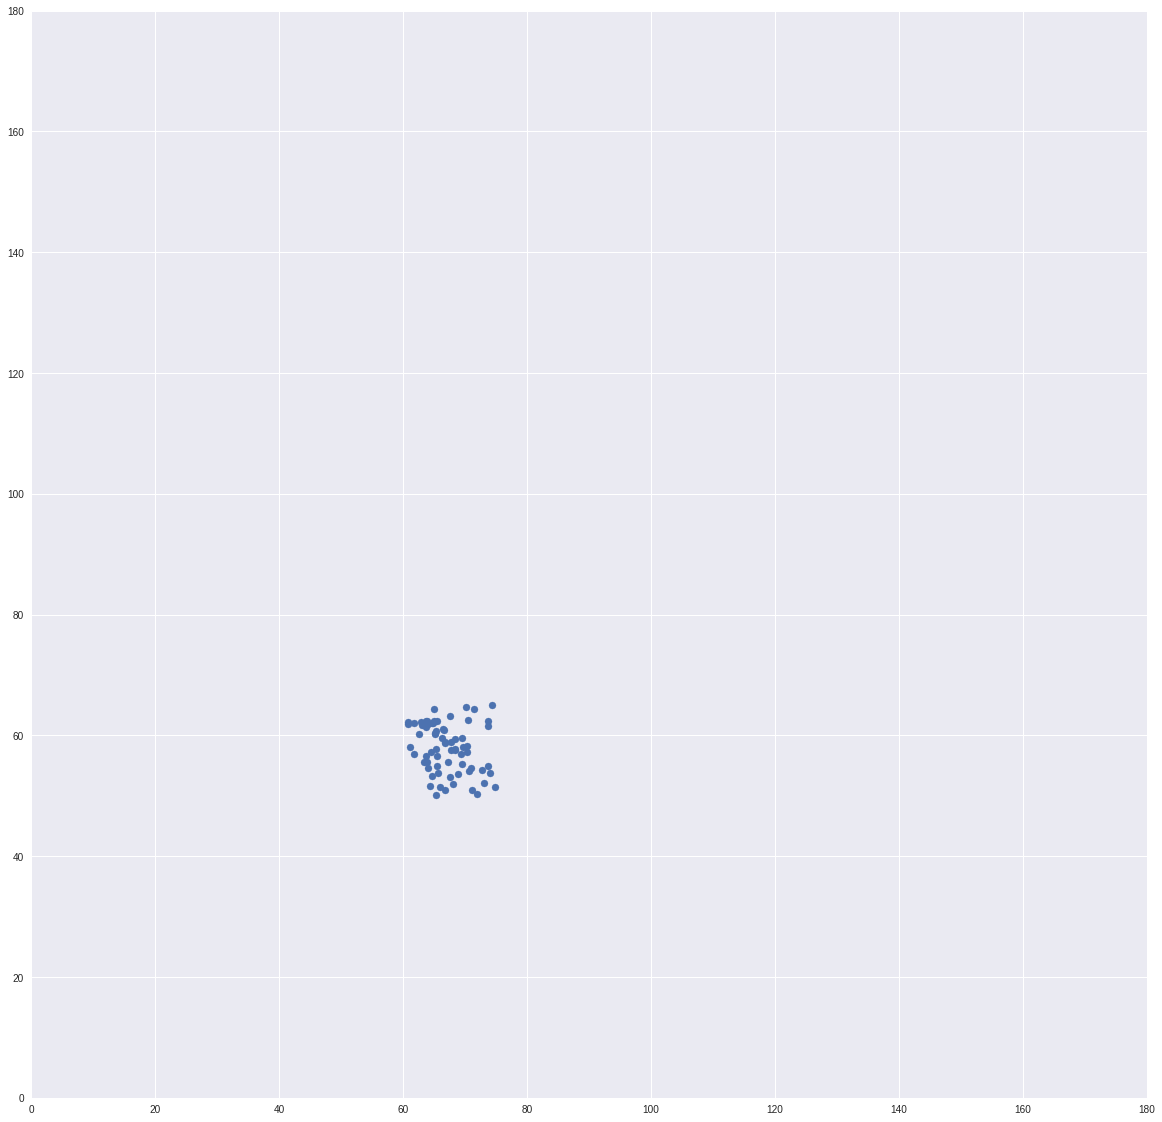

In [64]:
plt.scatter(*df_tmp1[mask2][['theta1','theta2']].values.T)
plt.xlim([0,180])
plt.ylim([0,180])